<a href="https://colab.research.google.com/github/casjunior93/demoday-tera-previsao-de-retorno-de-adsense/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando o acesso ao Google Drive no Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bibliotecas fundamentais

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Módulos de DataPrep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Modelos de regressão que iremos testar
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

#Testes
import scipy.stats as stats
from scipy.stats import mannwhitneyu, ttest_ind

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1. Abordar o problema e analisar o panorama em geral
2. Obter os dados
3. Explorar os dados para obter informações úteis
4. Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5. Explorar modelos diferentes e selecionar os melhores.
6. Aperfeiçoar os modelos e os combinar em uma solução ideal.
7. Apresentar a solução.
8. Implementar, monitorar e fazer a manutenção de seu sistema.

# 1: Abordar o problema e analisar o panorama em geral

**Objetivo:** Criar um modelo de previsão para monetização e pagamentos de influenciadores digitais.

**Público alvo:** Gestores de Redes Multicanal (MCNs) de criadores do YouTube. 

**Problema do usuário:** Não existe hoje nenhum modelo de previsão para que gestores de redes multicanal (MCNs) consigam realizar de maneira eficiente a previsão de pagamentos de valores recebidos pela plataforma de monetização do YouTube para canais afiliados e YouTube Creators.

**Solução:** Criarmos um modelo de análise para prever o retorno de Adsense baseado no histórico do influenciador.



# 2: Obter os dados

In [3]:
# Carregando os dados para treinamento do modelo
dados = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/porcentagem-visualizacao.csv',sep=',')
dados1 = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/inscritos.csv',sep=',')
dados2 = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/videos-publicados.csv',sep=',')
dados3 = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/visualizacoes.csv',sep=',')
receita = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/receita.csv',sep=',')
receita_est_adsense = pd.read_csv('/content/drive/MyDrive/ARQUIVOS TERA/Projeto Tera/Dados csv/receita-est-adsense.csv',sep=',')

# 3: Explorar os dados para obter informações úteis

## 3.1 Porcentagem visualizada média (%)

### 3.1.1 Dados

In [4]:
dados.head(2)

,Data,Canal,Título do canal,Porcentagem visualizada média (%)
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00


### 3.1.2 Visualização dos dados

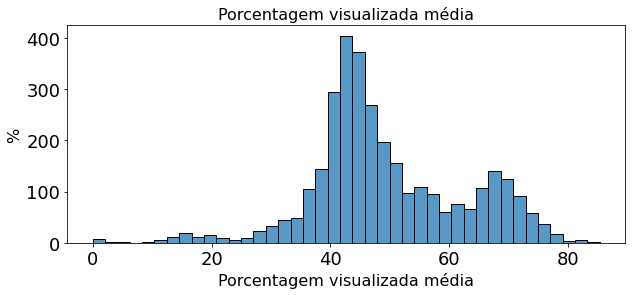

In [5]:
plt.figure(figsize=(10,4))
sns.histplot(dados['Porcentagem visualizada média (%)'])
plt.xlabel('Porcentagem visualizada média',size=16)
plt.ylabel('%',size=16)
plt.title('Porcentagem visualizada média',size=16)
plt.show()

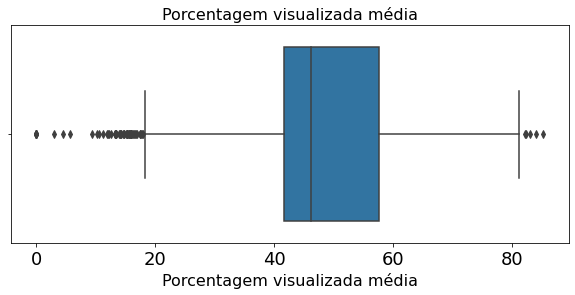

In [6]:
plt.figure(figsize=(10,4))
sns.boxplot(dados['Porcentagem visualizada média (%)'])
plt.xlabel('Porcentagem visualizada média',size=16)
plt.title('Porcentagem visualizada média',size=16)
plt.show()

## 3.2 Inscritos

### 3.2.1 Dados

In [7]:
dados1.tail(10)

,Data,Canal,Título do canal,Inscritos
3272,2022-05-27,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,413
3273,2022-05-28,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,391
3274,2022-05-29,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,580
3275,2022-05-30,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,803
3276,2022-05-31,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,795
3277,2022-06-01,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,916
3278,2022-06-02,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,895
3279,2022-06-03,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,804
3280,2022-06-04,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,845
3281,2022-06-05,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,1040


### 3.2.2 Visualização dos dados

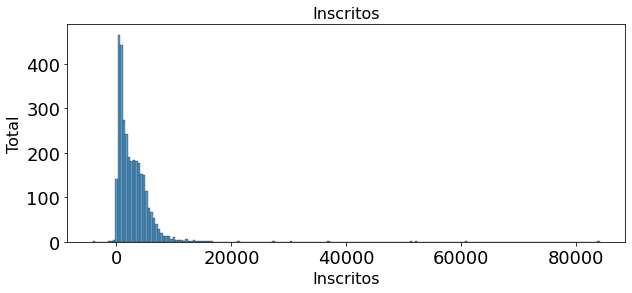

In [8]:
plt.figure(figsize=(10,4))
sns.histplot(dados1['Inscritos'])
plt.xlabel('Inscritos',size=16)
plt.ylabel('Total',size=16)
plt.title('Inscritos',size=16)
plt.show()

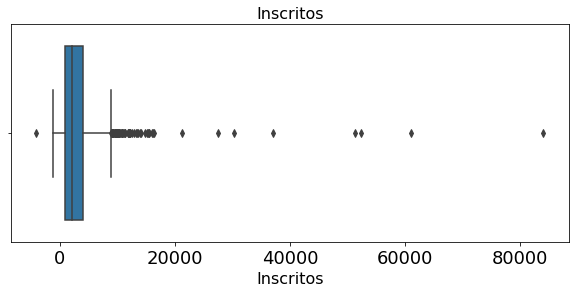

In [9]:
plt.figure(figsize=(10,4))
sns.boxplot(dados1['Inscritos'])
plt.xlabel('Inscritos',size=16)
plt.title('Inscritos',size=16)
plt.show()

## 3.3 Vídeos publicados

### 3.3.1 Dados

In [10]:
dados2.head(10)

,Data,Canal,Título do canal,Vídeos publicados
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
2,2013-06-13,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
3,2013-06-14,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
4,2013-06-15,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
5,2013-06-16,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
6,2013-06-17,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
7,2013-06-18,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
8,2013-06-19,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
9,2013-06-20,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0


### 3.3.2 Visualização dos dados

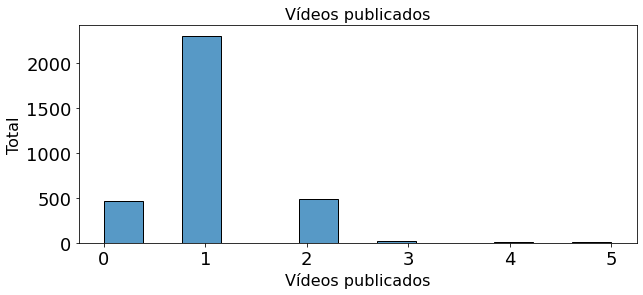

In [11]:
plt.figure(figsize=(10,4))
sns.histplot(dados2['Vídeos publicados'])
plt.xlabel('Vídeos publicados',size=16)
plt.ylabel('Total',size=16)
plt.title('Vídeos publicados',size=16)
plt.show()

## 3.4 Visualizações

### 3.4.1 Dados

In [12]:
dados3.head(10)

,Data,Canal,Título do canal,Visualizações
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
2,2013-06-13,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
3,2013-06-14,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
4,2013-06-15,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
5,2013-06-16,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
6,2013-06-17,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
7,2013-06-18,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
8,2013-06-19,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0
9,2013-06-20,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0


### 3.4.2 Visualização dos dados

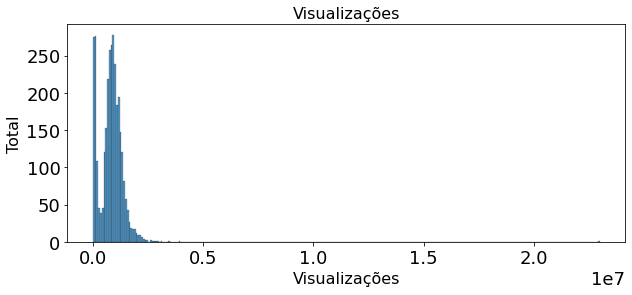

In [13]:
plt.figure(figsize=(10,4))
sns.histplot(dados3['Visualizações'])
plt.xlabel('Visualizações',size=16)
plt.ylabel('Total',size=16)
plt.title('Visualizações',size=16)
plt.show()

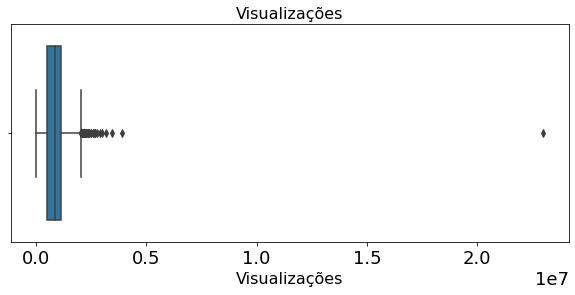

In [14]:
plt.figure(figsize=(10,4))
sns.boxplot(dados3['Visualizações'])
plt.xlabel('Visualizações',size=16)
plt.title('Visualizações',size=16)
plt.show()

## 3.5 Receita

### 3.5.1 Agrupando dados

In [15]:
receita.head(10)

,Data,Canal,Título do canal,Sua receita estimada (USD)
0,2013-06-11,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
1,2013-06-12,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
2,2013-06-13,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
3,2013-06-14,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
4,2013-06-15,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
5,2013-06-16,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
6,2013-06-17,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
7,2013-06-18,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
8,2013-06-19,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00
9,2013-06-20,UCFjrDmEnxrG5TRGVO0TPHLA,Numero 1,0.00


In [16]:
receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Data                        3295 non-null   object 
 1   Canal                       3295 non-null   object 
 2   Título do canal             3295 non-null   object 
 3   Sua receita estimada (USD)  3295 non-null   float64
dtypes: float64(1), object(3)
memory usage: 103.1+ KB


### 3.4.2 Visualização dos dados

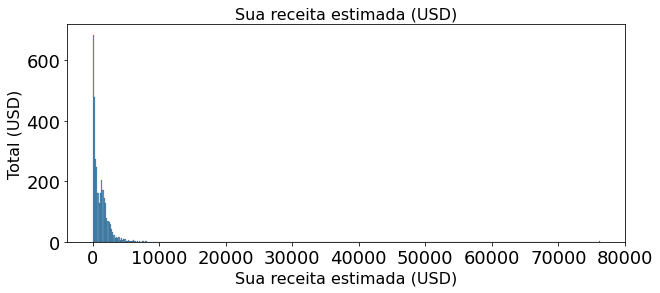

In [17]:
plt.figure(figsize=(10,4))
sns.histplot(receita['Sua receita estimada (USD)'])
plt.xlabel('Sua receita estimada (USD)',size=16)
plt.ylabel('Total (USD)',size=16)
plt.title('Sua receita estimada (USD)',size=16)
plt.show()

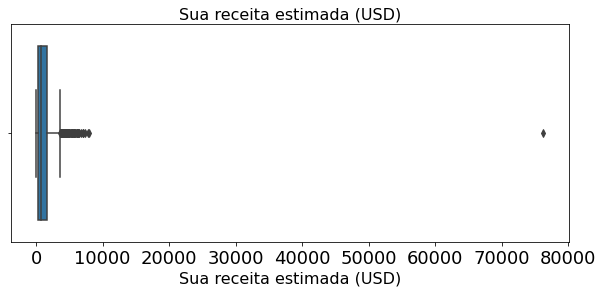

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(receita['Sua receita estimada (USD)'])
plt.xlabel('Sua receita estimada (USD)',size=16)
plt.title('Sua receita estimada (USD)',size=16)
plt.show()

## 3.6 Merge dos dataframes

In [19]:
df = pd.merge(dados[['Data', 'Porcentagem visualizada média (%)']], dados1[['Data', 'Inscritos']], how = 'inner',  on = 'Data')

In [20]:
df = pd.merge(df, dados2[['Data', 'Vídeos publicados']], how = 'inner',  on = 'Data')

In [21]:
df = pd.merge(df, dados3[['Data', 'Visualizações']], how = 'inner',  on = 'Data')

In [22]:
df = pd.merge(df, receita[['Data', 'Sua receita estimada (USD)']], how = 'inner',  on = 'Data')

In [23]:
df.tail(20)

,Data,Porcentagem visualizada média (%),Inscritos,Vídeos publicados,Visualizações,Sua receita estimada (USD)
3262,2022-05-17,22.99,1494,1,816718,183.44
3263,2022-05-18,34.96,594,2,868658,233.48
3264,2022-05-19,38.41,679,0,805857,190.93
3265,2022-05-20,36.47,530,1,679491,128.06
3266,2022-05-21,35.88,81,1,675329,109.70
3267,2022-05-22,37.57,568,1,737650,121.15
3268,2022-05-23,38.22,382,1,730472,122.33
3269,2022-05-24,28.07,498,1,694447,134.85
3270,2022-05-25,39.56,598,1,851344,186.33
3271,2022-05-26,38.56,767,1,761231,158.25


## 3.7 Visualização da variável target ao longo do tempo

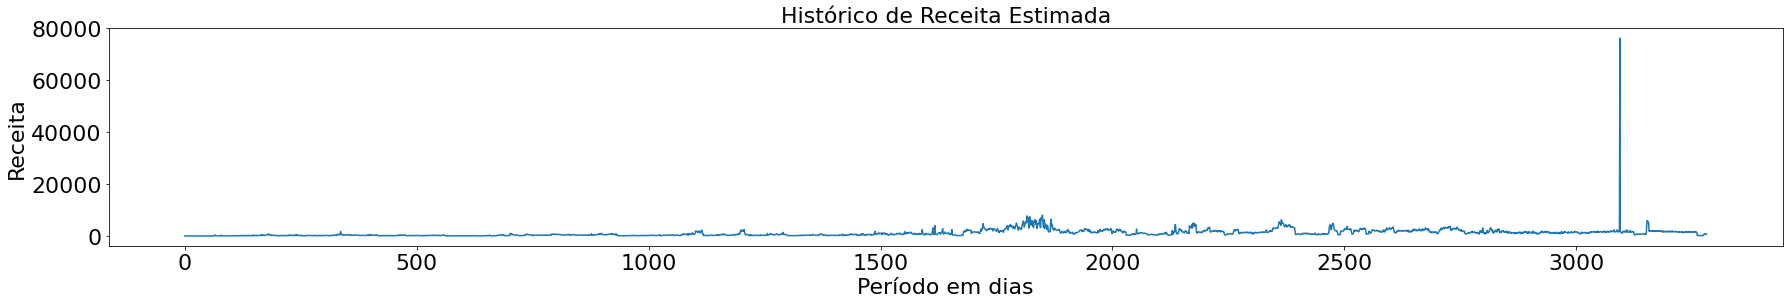

In [25]:
plt.figure(figsize=(30,4))
df['Sua receita estimada (USD)'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período em dias',size=22)
plt.ylabel('Receita',size=22)
plt.title('Histórico de Receita Estimada',size=22)

plt.show()

# 4 Análise descritiva

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Data                               3282 non-null   object 
 1   Porcentagem visualizada média (%)  3277 non-null   float64
 2   Inscritos                          3282 non-null   int64  
 3   Vídeos publicados                  3282 non-null   int64  
 4   Visualizações                      3282 non-null   int64  
 5   Sua receita estimada (USD)         3282 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 179.5+ KB


In [27]:
#data
df['Data'] = df['Data'].astype('datetime64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Data                               3282 non-null   datetime64[ns]
 1   Porcentagem visualizada média (%)  3277 non-null   float64       
 2   Inscritos                          3282 non-null   int64         
 3   Vídeos publicados                  3282 non-null   int64         
 4   Visualizações                      3282 non-null   int64         
 5   Sua receita estimada (USD)         3282 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 179.5 KB


In [29]:
df.describe(include='all')

,Data,Porcentagem visualizada média (%),Inscritos,Vídeos publicados,Visualizações,Sua receita estimada (USD)
count,3282,3277.00,3282.00,3282.00,3282.00,3282.00
unique,3282,NaN,NaN,NaN,NaN,NaN
top,2013-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
first,2013-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2022-06-05 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.29,2789.51,1.03,814514.07,1105.66
std,NaN,12.89,3298.99,0.60,622915.98,1718.36
min,NaN,0.00,-4153.00,0.00,0.00,0.00
25%,NaN,41.77,799.25,1.00,511120.25,224.74


In [30]:
df.shape

(3282, 6)

In [31]:
zeros = df[df["Sua receita estimada (USD)"]==0].index
df2 = df.drop(zeros)

In [32]:
df2.shape

(3269, 6)

In [33]:
df = df2

# 4.1 Teste de normalidade

In [34]:
shapiro_stat, shapiro_p_valor = stats.shapiro(df['Sua receita estimada (USD)'])

In [35]:
print('O valor da estatística de Shapiro-Wilk = ' + str(shapiro_stat))
print('O valor de p de Shapiro-Wilk = ' + str(shapiro_p_valor))

O valor da estatística de Shapiro-Wilk = 0.4038146734237671
O valor de p de Shapiro-Wilk = 0.0


Distribuição de receita não é normal.

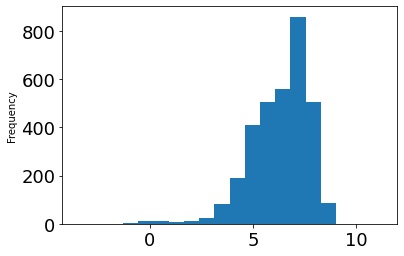

In [36]:
df['log_receita'] = np.log(df['Sua receita estimada (USD)'])
df['log_receita'].plot.hist(bins=20)

In [37]:
shapiro_stat2, shapiro_p_valor2 = stats.shapiro(df['log_receita'])
print('O valor da estatística de Shapiro-Wilk = ' + str(shapiro_stat2))
print('O valor de p de Shapiro-Wilk = ' + str(shapiro_p_valor2))

O valor da estatística de Shapiro-Wilk = 0.9202501177787781
O valor de p de Shapiro-Wilk = 1.5955367884901194e-38


Agora está bem próxima de uma normal

Padronizando o valor de log_receita:

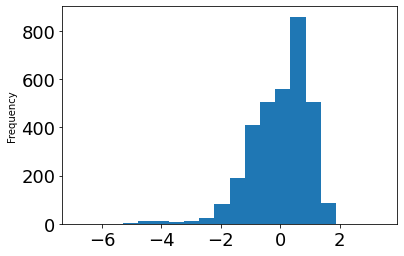

In [38]:
df['log_receita_padronizado'] = ( df['log_receita'] - df['log_receita'].mean() ) / df['log_receita'].std()
df['log_receita_padronizado'].plot.hist(bins=20)

Verificando a média e o desvio padrão:

In [39]:
x = df['log_receita_padronizado']
# calculando a média
mu = np.mean(x)
# calculando o desvio-padrão populacional
std = np.std(x)
#Imprimindo a média e o desvio-padrão
round(mu,3),round(std,3)

(-0.0, 1.0)

Verificando o z-score:

In [40]:
stats.norm.interval(alpha=0.95,loc=mu,scale=std)

(-1.9596641812519464, 1.9596641812519455)

In [41]:
# armazenando os dados em variáveis 
Z_score_inf = stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]
Z_score_sup = stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]

Com os limites para o Alpha de 0.95 conseguimos executar a inferência e descobrir quais datas tem receitas acima ou abaixo da média com um nível de confiança de 95%.

## 4.2 Receitas abaixo da média

In [42]:
df_inf = df[df['log_receita_padronizado']<Z_score_inf]

## 4.3 Receitas acima da média

In [43]:
df_sup = df[df['log_receita_padronizado']<Z_score_sup]

## 4.4 Receitas em 2021

In [44]:
df_2021 = df.query("Data >= '2021-01-01' and Data <= '2021-12-31'")

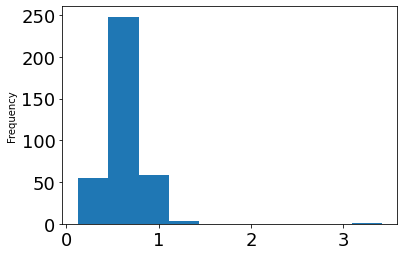

In [45]:
df_2021['log_receita_padronizado'].plot.hist()

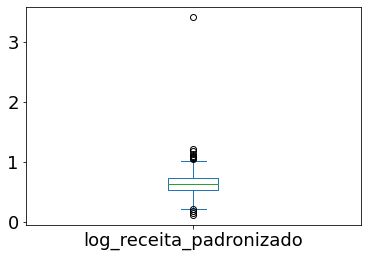

In [46]:
df_2021['log_receita_padronizado'].plot.box()

In [47]:
df_2021[df_2021['log_receita_padronizado'] > 3]

,Data,Porcentagem visualizada média (%),Inscritos,Vídeos publicados,Visualizações,Sua receita estimada (USD),log_receita,log_receita_padronizado
3094,2021-11-30,42.05,234,1,464402,76230.04,11.24,3.42


In [48]:
shapiro_stat3, shapiro_p_valor3 = stats.shapiro(df_2021['log_receita_padronizado'])
print('O valor da estatística de Shapiro-Wilk = ' + str(shapiro_stat3))
print('O valor de p de Shapiro-Wilk = ' + str(shapiro_p_valor3))

O valor da estatística de Shapiro-Wilk = 0.7395684123039246
O valor de p de Shapiro-Wilk = 1.559972755618913e-23


## 4.5 Criando a feature de mês

In [49]:
df_2021['mes'] = df_2021['Data'].map(lambda x: x.month)
df_2021['ano'] = df_2021['Data'].map(lambda x: x.year)

In [50]:
df_2021.head()

,Data,Porcentagem visualizada média (%),Inscritos,Vídeos publicados,Visualizações,Sua receita estimada (USD),log_receita,log_receita_padronizado,mes,ano
2761,2021-01-01,37.95,688,1,701429,720.99,6.58,0.18,1,2021
2762,2021-01-02,41.04,874,1,872821,881.08,6.78,0.32,1,2021
2763,2021-01-03,40.85,943,1,918740,828.14,6.72,0.28,1,2021
2764,2021-01-04,39.55,910,0,775319,791.51,6.67,0.25,1,2021
2765,2021-01-05,41.20,808,1,816971,920.46,6.82,0.35,1,2021


### 4.5.1 Funções para testes

In [51]:
# Shapiro wilk - verificar se é normal
def e_normal(group):
  wval, pval = stats.shapiro(group)
  if len(group) > 5000:
    if wval <0.05: return False
    if pval < 0.05: return False
  return True

# equal variance test
def var_igual(group1,group2):
  _,pval = stats.levene(group1,group2)
  if pval<0.05: return False
  return True

def stats_test(group1, group2):
  if e_normal(group1) and e_normal(group2):
    if var_igual(group1,group2):
      print("Realizando t-test...")
      return stats.ttest_ind(group1,group2)
    print("Relizando t-test com variancia diferente...")
    return stats.ttest_ind(group1,group2, equal_var = False)
  print("Realizando U-Test...")
  return mannwhitneyu(group1,group2)

## 4.6 Teste de hipótese: mês de novembro houve ganhos acima da média

-> Existe algum período (uma sazonalidade) que o ganho de um influencer é maior em um período do que em outro.

H0 - Não houve diferença nos ganhos em novembro

H1 - Houve diferenças nos ganhos em novembro

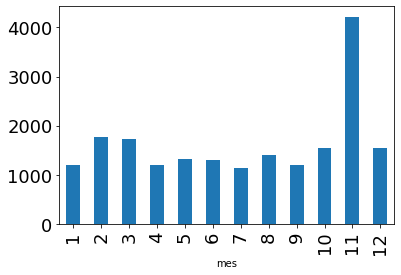

In [52]:
df_2021.groupby(['mes'])['Sua receita estimada (USD)'].mean().plot(kind = "bar")

In [53]:
df_2021_nov = df_2021[df_2021['mes'] == 11]

In [54]:
df_2021_nao_nov = df_2021[df_2021['mes'] != 11]

Médias:

In [55]:
print('Média de novembro: ', df_2021_nov['Sua receita estimada (USD)'].mean())
print('Média de outros meses: ', df_2021_nao_nov['Sua receita estimada (USD)'].mean())

Média de novembro:  4215.559666666666
Média de outros meses:  1396.0255820895522


Testando se a diferença é estatisticamente relevante:

In [56]:
stats_test(df_2021_nov['log_receita_padronizado'],df_2021_nao_nov['log_receita_padronizado'])

Realizando t-test...


Ttest_indResult(statistic=6.148480606263019, pvalue=2.063233164508811e-09)

Como p-value < 0.05, rejeita-se H0. Em novembro houve ganhos acima da média.

## 4.7 Teste de hipótese: maior número de novos vídeos fez novembro ter o maior ganho

-> O número de vídeos postados durante a semana afeta o valor da monetização

H0 - No mês com maior qntdade de novos vídeos não houve diferença nos ganhos

H1 - No mês com maior qntdade de novos vídeos houve diferença nos ganhos

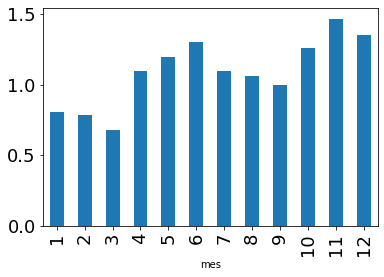

In [57]:
df_2021.groupby(['mes'])['Vídeos publicados'].mean().plot(kind = "bar")

In [58]:
#Médias:
print('Média de novembro de vídeos publicados: ', df_2021_nov['Vídeos publicados'].mean())
print('Média de outros meses de vídeos publicados: ', df_2021_nao_nov['Vídeos publicados'].mean())

Média de novembro de vídeos publicados:  1.4666666666666666
Média de outros meses de vídeos publicados:  1.0597014925373134


Testando se a diferença é estatisticamente relevante:

In [59]:
stats_test(df_2021_nov['Vídeos publicados'],df_2021_nao_nov['Vídeos publicados'])

Relizando t-test com variancia diferente...


Ttest_indResult(statistic=4.223054890410921, pvalue=0.0001705804839470374)

Como p-value < 0.5, rejeita-se H0. Como visto antes, novembro tem ganhos acima da média e também é o mês com maior quantidade de vídeos postados com uma quantidade acima da média.

## 4.7 Teste de hipótese: número de inscritos influenciam no mês com maior ganho

H0 - No mês com maior ganho não houve diferença nos números de inscritos

H1 - No mês com maior ganho houve diferença nos números de inscritos

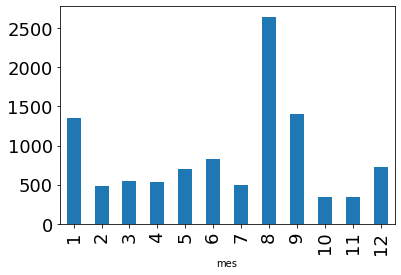

In [60]:
df_2021.groupby(['mes'])['Inscritos'].mean().plot(kind = "bar")

In [61]:
#Médias:
print('Média de novembro de inscritos: ', df_2021_nov['Inscritos'].mean())
print('Média de outros meses de inscritos: ', df_2021_nao_nov['Inscritos'].mean())

Média de novembro de inscritos:  346.8666666666667
Média de outros meses de inscritos:  918.7283582089552


Testando se a diferença é estatisticamente relevante:

In [62]:
stats_test(df_2021_nov['Inscritos'], df_2021_nao_nov['Inscritos'])

Relizando t-test com variancia diferente...


Ttest_indResult(statistic=-8.330454399534897, pvalue=1.7412808594143885e-15)

Como p-value < 0.5, rejeita-se H0. O mês de novembro teve um número de inscritos abaixo da média.

## 4.8 Teste de hipótese: número de visualizações influenciam no mês com maior ganho

H0 - No mês com maior ganho não houve diferença nas visualizações

H1 - No mês com maior ganho houve diferença nas visualizações

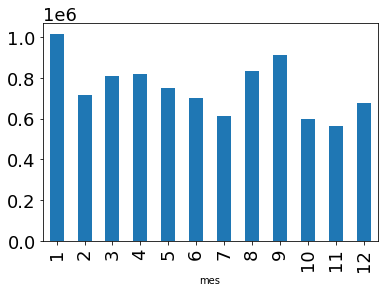

In [63]:
df_2021.groupby(['mes'])['Visualizações'].mean().plot(kind = "bar")

In [64]:
#Médias:
print('Média de novembro de visualizações: ', df_2021_nov['Visualizações'].mean())
print('Média de outros meses de visualizações: ', df_2021_nao_nov['Visualizações'].mean())

Média de novembro de visualizações:  565752.5
Média de outros meses de visualizações:  767523.1791044776


Testando se a diferença é estatisticamente relevante:

In [65]:
stats_test(df_2021_nov['Visualizações'], df_2021_nao_nov['Visualizações'])

Relizando t-test com variancia diferente...


Ttest_indResult(statistic=-10.592643471415602, pvalue=8.757059611922303e-16)

Como p-value < 0.5, rejeita-se H0.